### import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

### EDA

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
data.isnull().values.sum()

0

<AxesSubplot:>

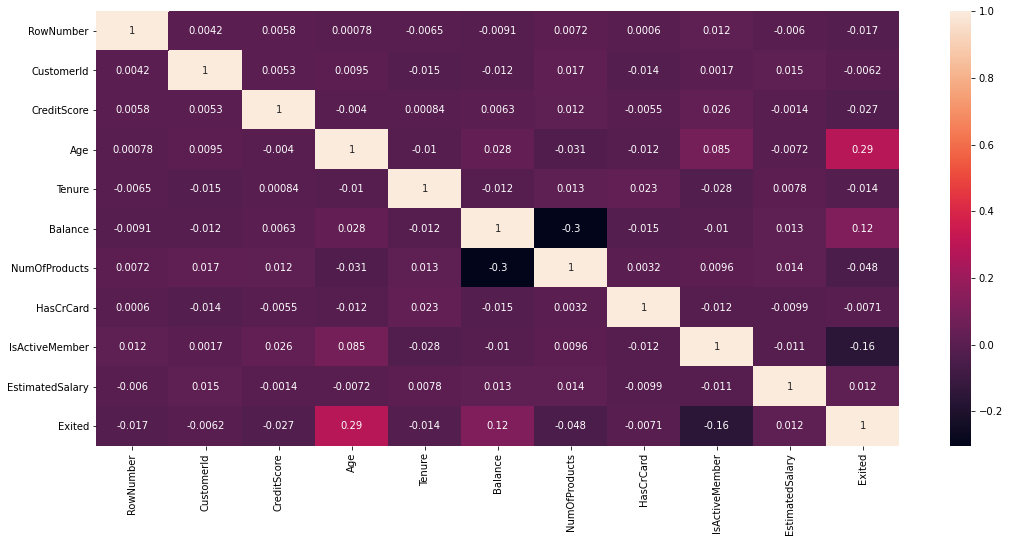

In [9]:
corr=data.corr()

plt.figure(figsize=(18,8))
sns.heatmap(corr,annot=True)

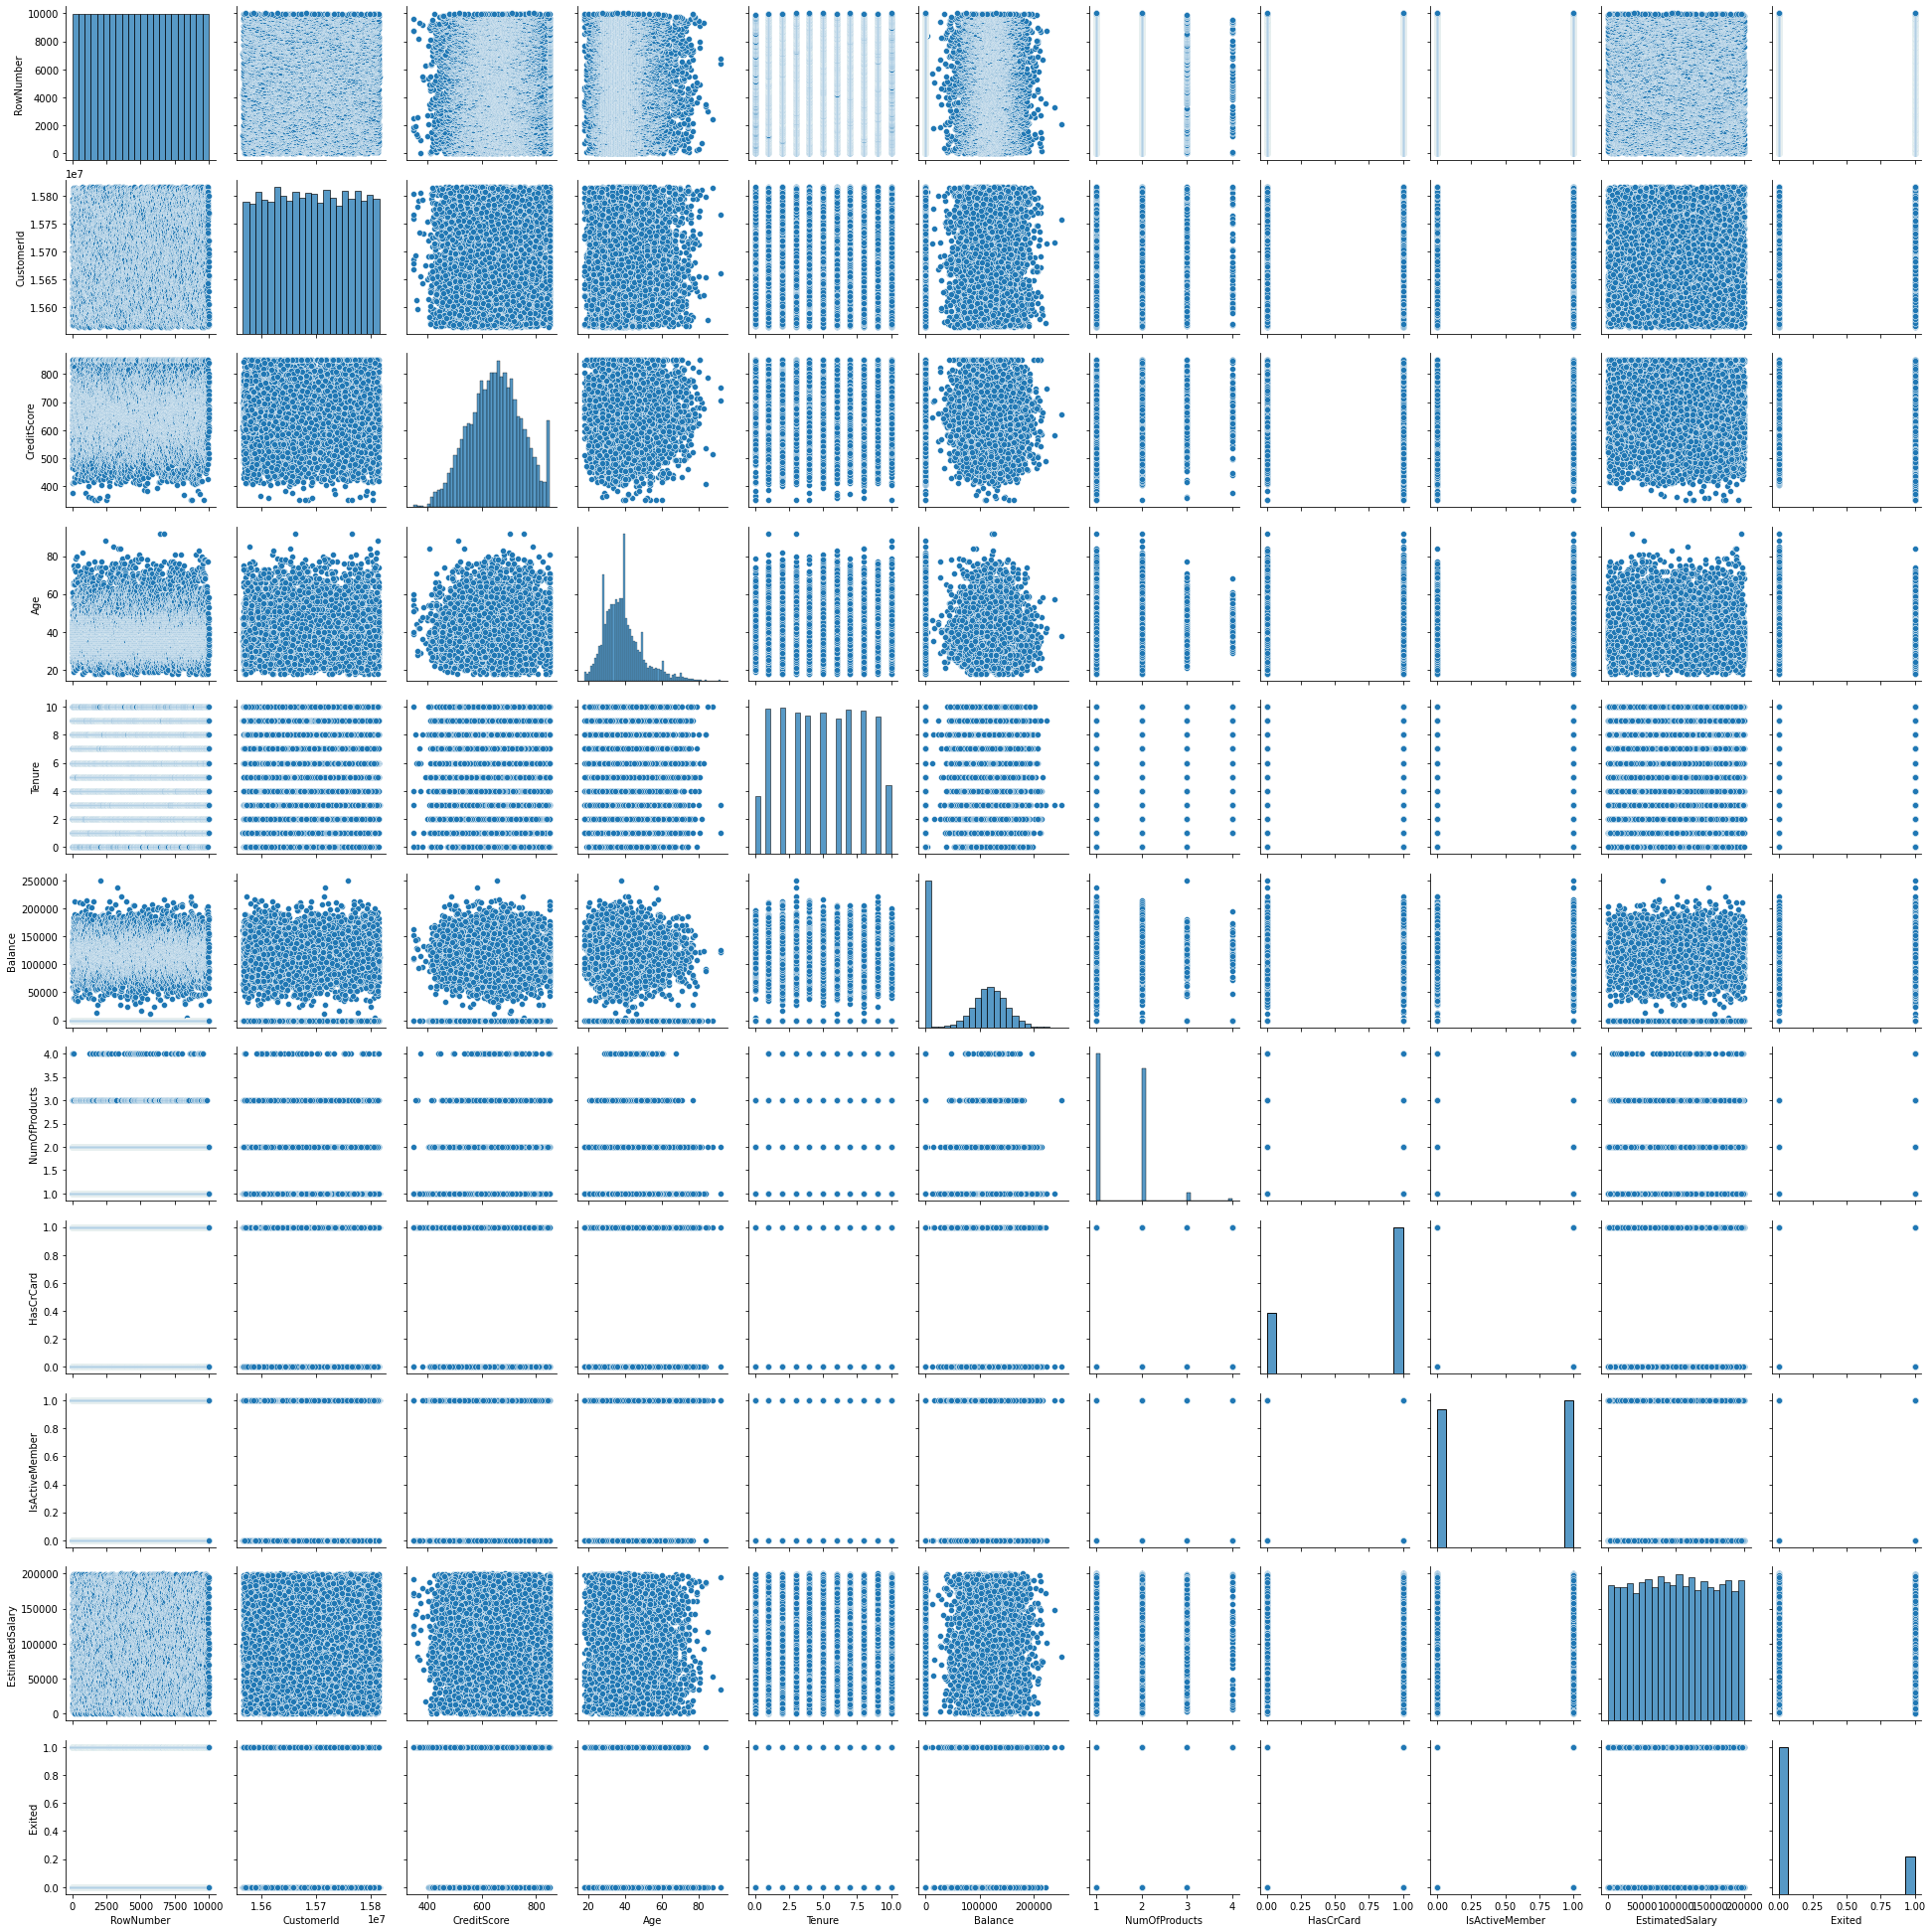

In [10]:
sns.pairplot(data)

### Data preprocessing

In [11]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
X=pd.get_dummies(X,drop_first=True)

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Model

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier=Sequential()

classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) 

In [37]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [38]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model=classifier.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.3,)

Epoch 1/100
525/525 [==============================] - 1s 1ms/step - loss: 0.5028 - accuracy: 0.7952 - val_loss: 0.4376 - val_accuracy: 0.7987
Epoch 2/100
525/525 [==============================] - 1s 1ms/step - loss: 0.4316 - accuracy: 0.7952 - val_loss: 0.4323 - val_accuracy: 0.7987
Epoch 3/100
525/525 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.7952 - val_loss: 0.4289 - val_accuracy: 0.7987
Epoch 4/100
525/525 [==============================] - 1s 1ms/step - loss: 0.4220 - accuracy: 0.8030 - val_loss: 0.4264 - val_accuracy: 0.8156
Epoch 5/100
525/525 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy: 0.8185 - val_loss: 0.4256 - val_accuracy: 0.8151
Epoch 6/100
525/525 [==============================] - 1s 1ms/step - loss: 0.4167 - accuracy: 0.8242 - val_loss: 0.4222 - val_accuracy: 0.8222
Epoch 7/100
525/525 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8265 - val_loss: 0.4199 - val_accuracy: 0.8244

Epoch 58/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3996 - accuracy: 0.8368 - val_loss: 0.4133 - val_accuracy: 0.8222
Epoch 59/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3988 - accuracy: 0.8362 - val_loss: 0.4134 - val_accuracy: 0.8231
Epoch 60/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3993 - accuracy: 0.8350 - val_loss: 0.4125 - val_accuracy: 0.8236
Epoch 61/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8347 - val_loss: 0.4118 - val_accuracy: 0.8244
Epoch 62/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3993 - accuracy: 0.8350 - val_loss: 0.4123 - val_accuracy: 0.8231
Epoch 63/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3999 - accuracy: 0.8337 - val_loss: 0.4141 - val_accuracy: 0.8236
Epoch 64/100
525/525 [==============================] - 1s 1ms/step - loss: 0.3997 - accuracy: 0.8350 - val_loss: 0.4154 - val_accuracy:

In [43]:
y_pred=classifier.predict(X_test)

y_pred=(y_pred>0.5)

<AxesSubplot:>

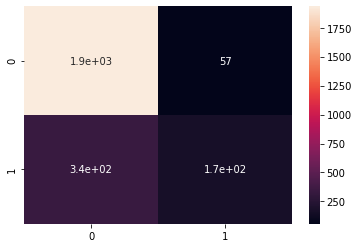

In [47]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,y_pred)

sns.heatmap(CM,annot=True)

### Evaluation using K Fold

In [52]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_classifier():
    classifier=Sequential()
    classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
    classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) 
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)

In [55]:
mean=accuracies.mean()
var=accuracies.std()

mean

0.8329333364963531

In [57]:
var

0.014727748080755413

In [ ]:
### Tuning the model using GridSearch

In [77]:
#from sklearn.model_selection import GridSearchCV

#def build_classifier(optimizer):
    #classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
    #classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
    #classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
    #classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) 
    #classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    #return classifier

#classifier=KerasClassifier(build_fn=build_classifier)

#parameters={'batch_size':[25,32],'epochs':[100,200],'optimizer';['adam','rmsprop']}

#grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10)
#grid_search=grid_search.fit(X_train,y_train)

#best_paramters=grid_search.best_params_
#best_accuracy=grid_search.best_score_